# <b style="color:blue">What is Support Vector Machines?</b>
 
SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs. Simply put, it does some extremely complex data transformations, then figures out how to seperate your data based on the labels or outputs you've defined.

<img src="https://www.surveypractice.org/article/2715-using-support-vector-machines-for-survey-research/attachment/9153.png" alt="SVM">

# <b style="color:blue">What makes it so great?</b>
 
Well SVM it capable of doing both classification and regression. In this post I'll focus on using SVM for classification. In particular I'll be focusing on non-linear SVM, or SVM using a non-linear kernel. Non-linear SVM means that the boundary that the algorithm calculates doesn't have to be a straight line. The benefit is that you can capture much more complex relationships between your datapoints without having to perform difficult transformations on your own. The downside is that the training time is much longer as it's much more computationally intensive.

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


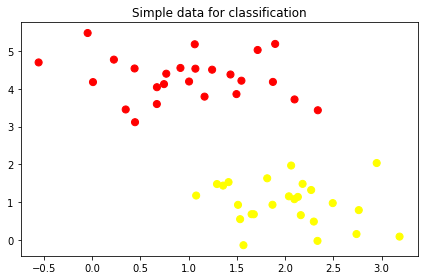

In [2]:
X, y = make_blobs(n_samples=50,
                 centers = 2, 
                 random_state = 0,
                 cluster_std = 0.60)
plt.scatter(X[:, 0],X[:, 1], c = y, s = 50, cmap = plt.cm.autumn)
plt.title('Simple data for classification')
plt.tight_layout()
plt.show()

## <b style="color:blue">Linear Discriminative Classifier</b>

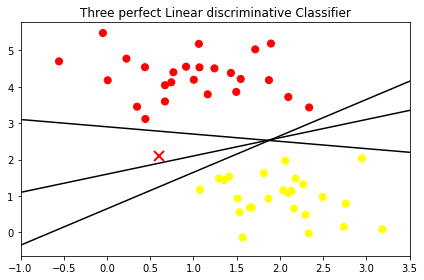

In [3]:
fit_x = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.autumn)
plt.plot([0.6], [2.1],'x', color = 'red', markeredgewidth = 2,
        markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(fit_x, m*fit_x +b,'-k')
    
plt.title('Three perfect Linear discriminative Classifier')
plt.xlim(-1, 3.5)
plt.tight_layout()
plt.show()

## Support Vector Classifier

In [4]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear", C = 1e10)
svc_model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
def plot_svc_decision_function(model, ax =None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()


    # create grid to evaluatiing model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors = 'K',
              levels = [-1, 0, 1], alpha = 0.5,
              linestyles = ['--','-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s = 300, linewidth = 1,
                  facecolors = 'none');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


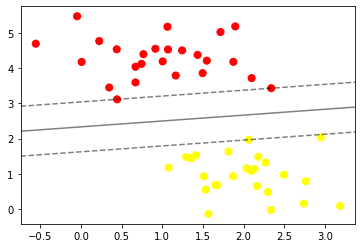

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.autumn)
plot_svc_decision_function(svc_model)

In [7]:
svc_model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [8]:
def plot_SVM(N = 10, ax = None):
    X, y = make_blobs(n_samples=200, centers=2,
                     random_state = 0, cluster_std = 0.60)
    X = X[:N]
    y = y[:N]
    
    
    model = SVC(kernel='linear', C = 1e10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c = y, s= 50, cmap = plt.cm.autumn)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

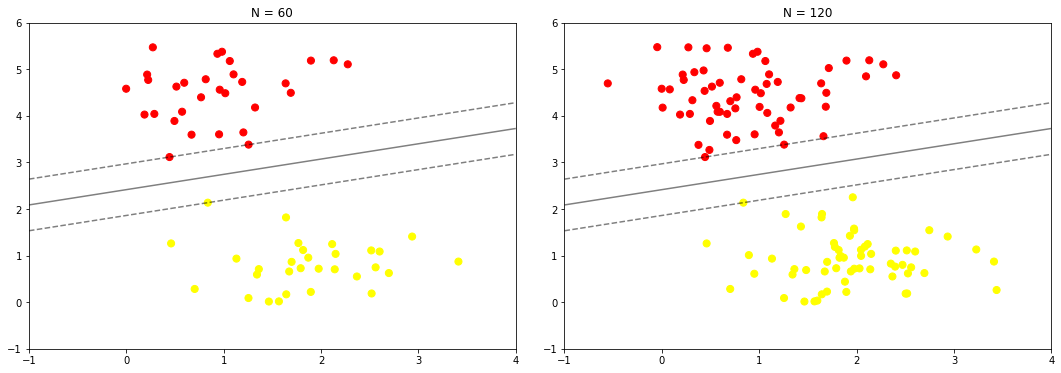

In [9]:
fig,ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
    plot_SVM(N, axi)
    axi.set_title('N = {0}'.format(N))

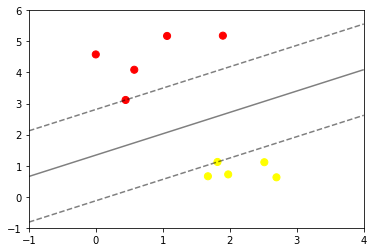

In [10]:
from ipywidgets import interact, fixed
interact(plot_SVM, N = [10,30, 40, 200], ax = fixed(None));